In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
from catboost import Pool, CatBoostClassifier

In [9]:
df=pd.read_csv("train.csv")

In [10]:
df1=pd.read_csv("test.csv")

In [30]:
extra=pd.read_csv("historical_user_logs.csv")

In [34]:
extra["action"].value_counts()

view        23854100
interest      433434
Name: action, dtype: int64

In [43]:
df["product_category_2"].value_counts()

82527.0     35531
146115.0    25224
270915.0    19624
254132.0    12502
143597.0     2701
269093.0      858
32026.0       578
18595.0        76
408790.0       67
255689.0       62
419804.0       43
372532.0       41
66101.0        34
234846.0       25
235358.0       19
450184.0       14
408831.0       12
327439.0        8
300711.0        4
447834.0        3
99226.0         2
168114.0        2
202351.0        1
181650.0        1
419304.0        1
301147.0        1
270147.0        1
247789.0        1
381435.0        1
Name: product_category_2, dtype: int64

In [55]:
df["DateTime"]=pd.to_datetime(df["DateTime"],format='%Y-%m-%d %H:%M')



In [56]:
df["day"]=df['DateTime'].dt.day

In [40]:
df[df["product"]=="B"]["var_1"].value_counts()

0    12959
1     9520
Name: var_1, dtype: int64

In [60]:
df1["DateTime"]=pd.to_datetime(df1["DateTime"],format='%Y-%m-%d %H:%M')
df1["day"]=df1['DateTime'].dt.day


In [57]:
df.tail()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,...,city_development_index,var_1,is_click,product_combined,product_webpage,product1,productweb1,product_combined1,Date,day
463286,583588,2017-07-07 23:59:00,572718,H,118601,28529,5,82527.0,4.0,Male,...,2.0,0,0,5_28529,H_28529,7,56,27,2017-07-07 23:59:00,7
463287,198389,2017-07-07 23:59:00,130461,I,118601,28529,4,82527.0,10.0,Female,...,2.0,1,0,4_28529,I_28529,8,65,21,2017-07-07 23:59:00,7
463288,563423,2017-07-07 23:59:00,306241,D,118601,28529,4,82527.0,2.0,Male,...,NaN,0,0,4_28529,D_28529,3,27,21,2017-07-07 23:59:00,7
463289,595571,2017-07-07 23:59:00,306241,D,118601,28529,5,82527.0,2.0,Male,...,NaN,0,0,5_28529,D_28529,3,27,27,2017-07-07 23:59:00,7
463290,45023,2017-07-07 23:59:00,1113780,C,405490,60305,3,NaN,5.0,Male,...,4.0,0,0,3_60305,C_60305,2,22,17,2017-07-07 23:59:00,7


In [4]:
df["product_category_2"].value_counts()

82527.0     35531
146115.0    25224
270915.0    19624
254132.0    12502
143597.0     2701
269093.0      858
32026.0       578
18595.0        76
408790.0       67
255689.0       62
419804.0       43
372532.0       41
66101.0        34
234846.0       25
235358.0       19
450184.0       14
408831.0       12
327439.0        8
300711.0        4
447834.0        3
99226.0         2
168114.0        2
202351.0        1
181650.0        1
419304.0        1
301147.0        1
270147.0        1
247789.0        1
381435.0        1
Name: product_category_2, dtype: int64

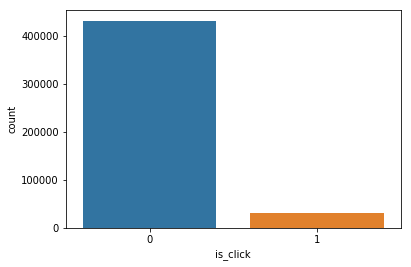

In [5]:
sns.countplot(x="is_click",data=df)

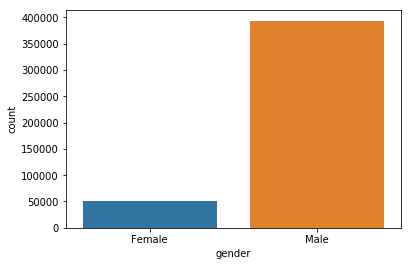

In [6]:
sns.countplot(x="gender",data=df)

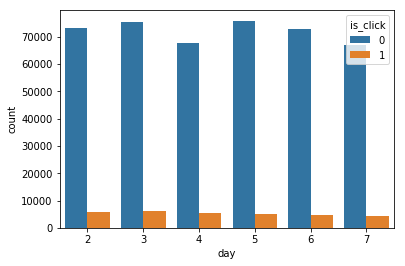

In [75]:
sns.countplot(x="day",data=df,hue="is_click")

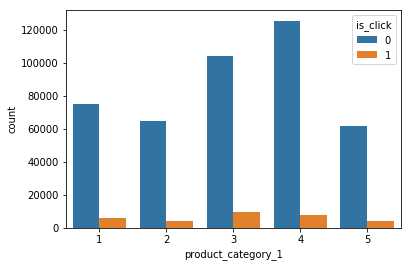

In [77]:
sns.countplot(x="product_category_1",data=df,hue="is_click")

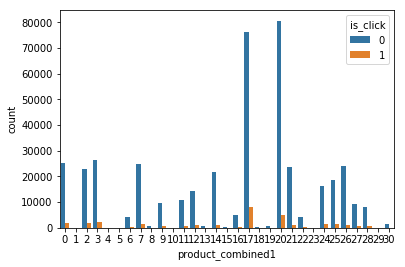

In [79]:
sns.countplot(x="product_combined1",data=df,hue="is_click")

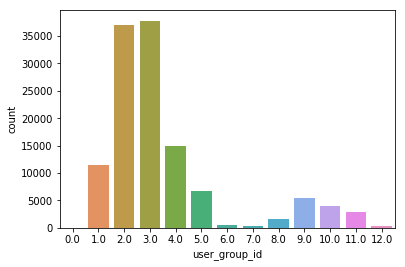

In [10]:
sns.countplot(x="user_group_id",data=df1)

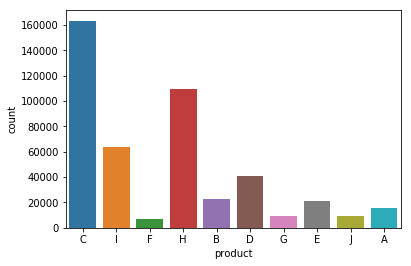

In [12]:
sns.countplot(x="product",data=df)

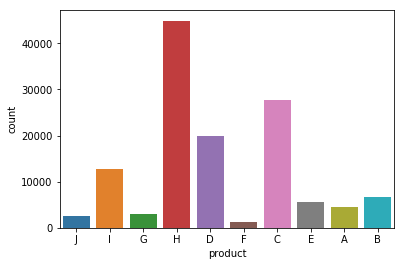

In [13]:
sns.countplot(x="product",data=df1)

In [48]:
df["var_1"].value_counts()

0    267704
1    195587
Name: var_1, dtype: int64

In [71]:
df.isna().sum()

session_id                     0
DateTime                       0
user_id                        0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
product_webpage                0
product1                       0
productweb1                    0
product_combined               0
product_combined1              0
dtype: int64

In [11]:
df["product_combined"]=df["product_category_1"].astype(str) + "_" + df["webpage_id"].astype(str)

In [12]:
df1["product_combined"]=df1["product_category_1"].astype(str) + "_" + df1["webpage_id"].astype(str)


In [59]:
df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click,product_webpage,product1,productweb1,product_combined,product_combined1
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0,C_13787,2,17,4_13787,20
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0,C_11085,2,16,5_11085,25
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0,C_13787,2,17,4_13787,20
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0,I_13787,8,63,3_13787,14
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0,C_60305,2,22,3_60305,17


In [13]:
df["product_webpage"]=df["product"].astype(str) + "_" + df["webpage_id"].astype(str)

In [ ]:
df["productcat_webpage"]=df["product_category_1"].astype(str) + "_" + df["webpage_id"].astype(str)

In [18]:
df["user_age"]=df["user_group_id"].astype(str) + "_" + df["age_level"].astype(str)

In [19]:
df1["product_combined"]=df1["product_category_1"].astype(str) + "_" + df1["product_category_2"].astype(str)

df1["user_age"]=df1["user_group_id"].astype(str) + "_" + df1["age_level"].astype(str)

In [14]:
df1["product_webpage"]=df1["product"].astype(str) + "_" + df1["webpage_id"].astype(str)

In [65]:
X=df.drop(["is_click","session_id","DateTime","user_id","product","product_webpage","gender","product_combined","Date"],axis=1)
y=df["is_click"]

In [61]:
test=df1.drop(["session_id","DateTime","user_id","product","product_webpage","gender","product_combined"],axis=1)

In [62]:
X.head()

,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,age_level,user_depth,city_development_index,var_1,product1,productweb1,product_combined1,Date,day
0,359520,13787,4,NaN,10.0,4.0,3.0,3.0,0,2,17,20,2017-07-02 00:00:00,2
1,105960,11085,5,NaN,8.0,2.0,2.0,NaN,0,2,16,25,2017-07-02 00:00:00,2
2,359520,13787,4,NaN,8.0,2.0,2.0,NaN,0,2,17,20,2017-07-02 00:00:00,2
3,359520,13787,3,NaN,3.0,3.0,3.0,2.0,1,8,63,14,2017-07-02 00:00:00,2
4,405490,60305,3,NaN,2.0,2.0,3.0,2.0,1,2,22,17,2017-07-02 00:01:00,2


In [66]:
X.shape

(463291, 13)

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [16]:
le.fit(df["product"])

LabelEncoder()

In [17]:
df["product1"]=le.transform(df["product"])
df1["product1"]=le.transform(df1["product"])

In [30]:
le.fit(df["gender"])

TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
df["gender1"]=le.transform(df["gender"])
df1["gender1"]=le.transform(df1["gender"])

In [18]:
le.fit(df["product_webpage"])

LabelEncoder()

In [19]:
df["productweb1"]=le.transform(df["product_webpage"])
df1["productweb1"]=le.transform(df1["product_webpage"])

In [20]:
le.fit(df["product_combined"])

LabelEncoder()

In [21]:
df["product_combined1"]=le.transform(df["product_combined"])
df1["product_combined1"]=le.transform(df1["product_combined"])

In [38]:
le.fit(df["user_age"])

LabelEncoder()

In [39]:
df["userage1"]=le.transform(df["user_age"])
df1["userage1"]=le.transform(df1["user_age"])

In [64]:
import lightgbm as lgb
model = lgb.LGBMClassifier(n_estimators = 400)

In [65]:
model.fit(X,y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=400,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [66]:
pred=model.predict(test)

C:\Users\Sreyan\Miniconda3\envs\AI\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [67]:
predict=pd.DataFrame(pred)

In [68]:
predict[0].value_counts()

0    128837
1        21
Name: 0, dtype: int64

In [69]:
predict.to_csv(path_or_buf="C:/Users/Sreyan/Desktop/New folder/pred1.csv", sep=",")

In [68]:
import xgboost as xgb
model=xgb.XGBClassifier(n_estimators=200,
        eta= 0.2,
        max_depth= 10,
        
        silent= 1,
        
        gamma= 0.8,
        min_child_weight= 4,
        colsample_bytree= 0.7,
        colsample_bylevel= 0.8)
model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
       colsample_bytree=0.7, eta=0.2, gamma=0.8, learning_rate=0.1,
       max_delta_step=0, max_depth=10, min_child_weight=4, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1, subsample=1)

In [72]:
predictXG=model.predict(X
                       )

C:\Users\Sreyan\Miniconda3\envs\AI\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [73]:
predictXG1=pd.DataFrame(predictXG)

In [74]:
predictXG1[0].value_counts()

0    463276
1        15
Name: 0, dtype: int64

In [89]:
X.head()

,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,age_level,user_depth,city_development_index,var_1,product1,productweb1,product_combined1,day
0,359520,13787,4,NaN,10.0,4.0,3.0,3.0,0,2,17,20,2
1,105960,11085,5,NaN,8.0,2.0,2.0,NaN,0,2,16,25,2
2,359520,13787,4,NaN,8.0,2.0,2.0,NaN,0,2,17,20,2
3,359520,13787,3,NaN,3.0,3.0,3.0,2.0,1,8,63,14,2
4,405490,60305,3,NaN,2.0,2.0,3.0,2.0,1,2,22,17,2


In [85]:
print(model.feature_importances_)

[ 8.44327729 10.38510634  2.05835061  5.95367571  8.02226022  7.15074578
  4.26825717  8.17888361  4.59179541  1.0995319  18.13369599  8.79050245
 12.92391752]


In [88]:
xgb.plot_importance(model)
pyplot.show()

ValueError: tree must be Booster, XGBModel or dict instance

In [82]:
model= CatBoostClassifier(n_estimators=200)
        

In [83]:
model.fit(X,y)

0:	learn: 0.3677747	total: 182ms	remaining: 36.2s
1:	learn: 0.2821706	total: 331ms	remaining: 32.8s
2:	learn: 0.2569777	total: 500ms	remaining: 32.8s
3:	learn: 0.2485450	total: 680ms	remaining: 33.3s
4:	learn: 0.2456705	total: 835ms	remaining: 32.6s
5:	learn: 0.2445176	total: 989ms	remaining: 32s
6:	learn: 0.2441482	total: 1.15s	remaining: 31.8s
7:	learn: 0.2439729	total: 1.29s	remaining: 31s
8:	learn: 0.2438557	total: 1.45s	remaining: 30.7s
9:	learn: 0.2437191	total: 1.61s	remaining: 30.6s
10:	learn: 0.2436631	total: 1.75s	remaining: 30s
11:	learn: 0.2435906	total: 1.89s	remaining: 29.7s
12:	learn: 0.2435393	total: 2.06s	remaining: 29.7s
13:	learn: 0.2434907	total: 2.21s	remaining: 29.4s
14:	learn: 0.2434353	total: 2.38s	remaining: 29.4s
15:	learn: 0.2433774	total: 2.53s	remaining: 29.1s
16:	learn: 0.2433118	total: 2.67s	remaining: 28.7s
17:	learn: 0.2432783	total: 2.81s	remaining: 28.5s
18:	learn: 0.2432122	total: 3s	remaining: 28.6s
19:	learn: 0.2431422	total: 3.15s	remaining: 28.4s

161:	learn: 0.2401830	total: 25.1s	remaining: 5.89s
162:	learn: 0.2401670	total: 25.3s	remaining: 5.73s
163:	learn: 0.2401501	total: 25.4s	remaining: 5.58s
164:	learn: 0.2401423	total: 25.6s	remaining: 5.42s
165:	learn: 0.2401370	total: 25.7s	remaining: 5.26s
166:	learn: 0.2401146	total: 25.9s	remaining: 5.11s
167:	learn: 0.2400999	total: 26s	remaining: 4.95s
168:	learn: 0.2400888	total: 26.2s	remaining: 4.8s
169:	learn: 0.2400795	total: 26.3s	remaining: 4.64s
170:	learn: 0.2400664	total: 26.5s	remaining: 4.49s
171:	learn: 0.2400514	total: 26.6s	remaining: 4.33s
172:	learn: 0.2400323	total: 26.8s	remaining: 4.17s
173:	learn: 0.2400249	total: 26.9s	remaining: 4.02s
174:	learn: 0.2400122	total: 27.1s	remaining: 3.86s
175:	learn: 0.2399878	total: 27.2s	remaining: 3.71s
176:	learn: 0.2399708	total: 27.4s	remaining: 3.56s
177:	learn: 0.2399615	total: 27.5s	remaining: 3.4s
178:	learn: 0.2399463	total: 27.7s	remaining: 3.25s
179:	learn: 0.2399294	total: 27.8s	remaining: 3.09s
180:	learn: 0.23

In [27]:
predcat=model.predict(test)

In [28]:
predictcat=pd.DataFrame(predcat)

In [29]:
predictcat[0].value_counts()

0.0    128846
1.0        12
Name: 0, dtype: int64